# 確率分布

## 離散確率分布



### 離散一様分布

離散型確率変数$X$が

$$
P(X=x|N) = \frac{1}{N}, x=1,2,...,N
$$

なる確率関数をもつとき、$X$は**離散一様分布**（discrete uniform distribution）に従うという。

$$
E[X] = \frac{1}{N} \sum^N_{x=1} x = \frac{N + 1}{2}
$$

:::{margin} **離散一様分布の期待値の補足**
$$
\sum^N_{x=1} x = \frac{N(N+1)}{2}
$$

であるため、

$$
\frac{1}{N} \sum^N_{x=1} x = \frac{N + 1}{2}
$$
:::

$$
V[X] = \frac{(N + 1)(N-1)}{12}
$$


### ベルヌーイ分布

ベルヌーイ試行とは、$p$の確率で「成功」、$1-p$の確率で「失敗」する実験を行うことをいう。

確率変数$X$が成功のとき1、失敗のとき0をとるものとすると、確率関数は

$$
P(X=x|p) =
\begin{cases}
p & (x=1)\\
1-p & (x=0)
\end{cases}
$$

と書ける。これを**ベルヌーイ分布**（Bernoulli distribution）という。

$$
\begin{align}
E[X] &= 1 \times p + 0 \times (1 - p) = p\\
V[X] &= (1-p)^2 \times p + (0-p)^2 \times (1 - p) = p(1-p)
\end{align}
$$




### 二項分布

ベルヌーイ試行を独立に$n$回行ったときの「成功」の回数の分布

$i=1,2,...,n$に対して確率変数$X_i$を成功のとき1、失敗のとき0をとるものとすると、「成功」の回数は$Y=\sum^n_{i=1}X_i$と表すことができる。

$Y=k$となる確率は以下のようになる。

$$
P(Y=k) = {}_n C_k p^k (1 - p)^{n-k}
$$

```{margin} 組み合わせ（二項係数）
$$
{}_n C_k  = \frac{n!}{k!(n-k)!} = \binom nk
$$
```


```{admonition} 例：$Y=2$となる確率の場合
:class: tip

成功が2回、失敗が$n-2$回とする。

「成功」の事象を$A_i$、「失敗」の事象を$A_i^c$とすると、最初の2回が「成功」となる事象の確率は

$$
P(A_1 \cap A_2 \cap A_3^c \cap \cdots \cap A_n^c)
$$

と表すことができる。

試行の独立性と$P(A_i)=p, P(A_i^c)=1-p$から

$$
\begin{align}
&P(A_1 \cap A_2 \cap A_3^c \cap \cdots \cap A_n^c)\\
&= P(A_1)P(A_2)P(A_3^c)\times\cdots\times P(A_n^c)\\
&= p^2(1-p)^{n-2}
\end{align}
$$

と書くことができる。

$n$回試行して2回成功する事象の組み合わせは$A_1 \cap A_2^c \cap A_3 \cap \cdots \cap A_n^c$や$A_1^c \cap A_2^c \cap A_3 \cap \cdots \cap A_n$など他にも考えられ、その場合の数は組み合わせの数になるため${}_n C_2$となる。


したがって、$Y=2$となる確率は

$$
P(Y=2) = {}_n C_2 p^2 (1 - p)^{n-2}
$$

となり、この$2$を$k$にすれば上記のものになる
```

$$
E[X] = np\\
V[X] = np(1-p)
$$


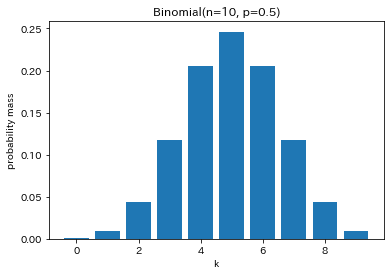

In [1]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import pandas as pd

from scipy.stats import binom

np.random.seed(0)
n = 10
p = 0.5
k = range(0, 10)
pmf = binom.pmf(k, n=n, p=p)

fig, ax = plt.subplots()
ax.bar(k, pmf)
ax.set(title=f"Binomial(n={n}, p={p})", xlabel="k", ylabel="probability mass")
fig.show()

## 連続型確率分布

### 正規分布

確率変数$X$が平均$\mu$、分散$\sigma^2$の正規分布（normal distribution）に従うとは、$X$の確率密度関数が


$$
P(x|\mu, \sigma^2)
 = \frac{1}{\sqrt{2\pi}\sigma}
 \exp \left\{ - \frac{(x-\mu)^2}{2\sigma^2} \right\}
 , \hspace{1em} -\infty < x < \infty
$$

で与えられることをいい、この分布を$N(\mu, \sigma^2)$で表す。

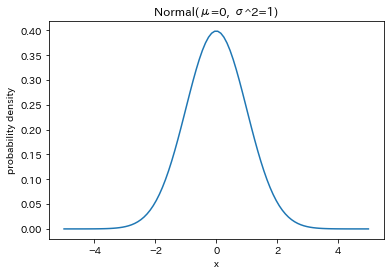

In [2]:
from scipy.stats import norm

np.random.seed(0)
x = np.linspace(-5, 5, 100)
pdf = norm.pdf(x)

fig, ax = plt.subplots()
ax.plot(x, pdf)
ax.set(title="Normal(μ=0, σ^2=1)", xlabel="x", ylabel="probability density")
fig.show()

### ガンマ分布

**ガンマ分布**（gamma distribution）は非負の実数直線上の代表的な確率分布。その確率密度関数は

$$
f(x|\alpha, \beta)
= \frac{1}{\Gamma(\alpha)}
\frac{1}{\beta}
\left( \frac{x}{\beta} \right) ^{\alpha-1}
e^{-x/\beta}
, \ x > 0
$$

である。$\alpha$はshape parameter、$\beta$はscale parameterと呼ばれ、$\alpha > 0, \beta > 0$である。

尺度変換$Y = X /\beta$を行うと、$Y$の分布は$\beta f(\beta y|\alpha, \beta)$となり

$$
f(y|\alpha) = \frac{1}{\Gamma(\alpha)}
y^{\alpha-1}
e^{-y}
,  \ y > 0
$$

となる。

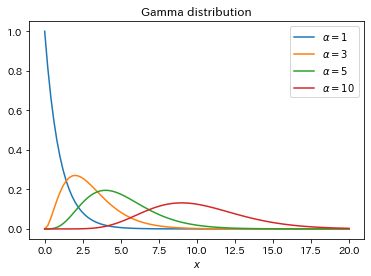

In [23]:
import numpy as np
from scipy.stats import gamma

x = np.linspace(0, 20, 100)

fig, ax = plt.subplots()
for alpha in [1, 3, 5, 10]:
    y = gamma.pdf(x, alpha)
    ax.plot(x, y, label=fr"$\alpha={alpha}$")
ax.legend()
ax.set(title=r"Gamma distribution", xlabel=r"$x$")
fig.show()



ここで$\Gamma(\alpha)$は**ガンマ関数**（gamma function）

$$
\Gamma(\alpha)
= \int^{\infty}_0 y^{\alpha-1} e^{-y} dy
$$


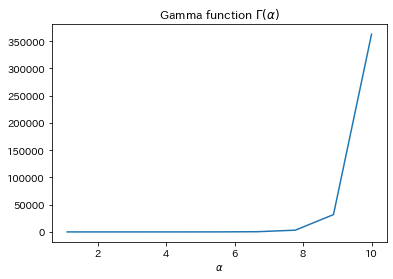

In [12]:
from scipy.special import gamma

x = np.linspace(0, 10, 10)
y = gamma(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(title=r"Gamma function $\Gamma(\alpha)$", xlabel=r"$\alpha$")
fig.show()

### $\chi^2$分布

データの二乗和が従う確率分布のこと。標準正規分布に従う確率変数$X_i$の二乗和$Z_i = \sum_i^n X_i^2$は**自由度$n$のカイ2乗分布**（chi-square distribution with n degrees of freedom）に従う（$n$は自然数）

$$
Z \sim \chi^2_{(n)}
$$

カイ2乗分布の密度関数は

$$
f(x) = \frac{1}{\Gamma(n/2)} \left( \frac{1}{2} \right)^{n/2} x^{n/2-1} \exp \{ - \frac{x}{2} \}, x > 0
$$


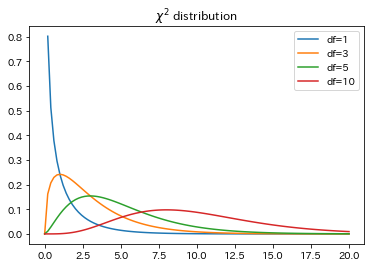

In [20]:
from scipy.stats import chi2

x = np.linspace(0, 20, 100)
dfs = [1, 3, 5, 10]

fig, ax = plt.subplots()
for df in dfs:
    y = chi2.pdf(x, df=df)
    ax.plot(x, y, label=f"df={df}")
ax.legend()
ax.set(title=r"$\chi^2$ distribution")
fig.show()

## 分布の性質

### 再生性

確率変数の和が同じ確率分布になることを再生性という。

例えば、$N(\mu_1, \sigma_1^2)$の正規分布に従う確率変数と$N(\mu_2, \sigma_2^2)$の正規分布に従う確率変数の和は、$N(\mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2)$の正規分布に従う。

:::{note}

「再生性を持っていたとしても（例えば正規分布でも）、2つの分布を足したら2つの峰の分布になるのではないか？」と思われるかもしれない。

例えば、1つ目の分布から得た$n$個のサンプル$(x_1, x_2, \dots, x_n)$があり、もう1つの分布からも同様に$n$個のサンプル$(y_1, y_2, \dots, y_n)$が得られているとする。

仮にサンプルを連結するように足す、すなわち

$$
(x_1, x_2, \dots, x_n, y_1, y_2, \dots, y_n)
$$

という$2n$個のサンプルを作る場合、これは2つの峰の分布となる。

しかし、再生性で議論しているのは

$$
\begin{pmatrix}
x_1\\
x_2\\
\vdots\\
x_n
\end{pmatrix}
+
\begin{pmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{pmatrix}
$$

という演算である
:::

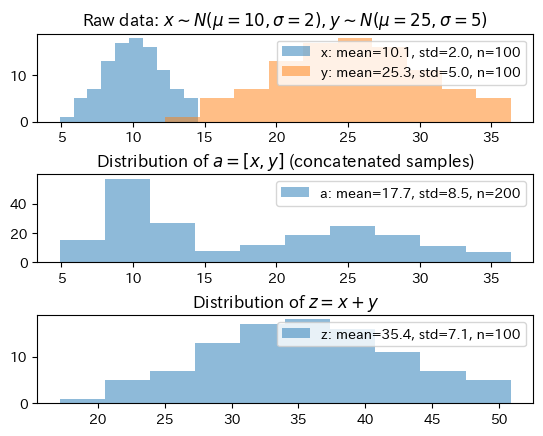

In [51]:
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.stats import norm

x = norm.rvs(loc=10, scale=2, size=100, random_state=0)
y = norm.rvs(loc=25, scale=5, size=100, random_state=0)

def info(x):
    return f"mean={x.mean():.1f}, std={x.std():.1f}, n={len(x)}"
    

fig, axes = plt.subplots(nrows=3)
fig.subplots_adjust(hspace=0.6)
axes[0].hist(x, label=f"x: {info(x)}", alpha=.5)
axes[0].hist(y, label=f"y: {info(y)}", alpha=.5)
axes[0].set(title=r"Raw data: $x \sim N(\mu=10, \sigma=2), y \sim N(\mu=25, \sigma=5)$")
axes[0].legend()


# もしレコードを結合するなら、２峰の分布になる
import numpy as np
a = np.append(x, y)
axes[1].hist(a, label=f"a: {info(a)}", alpha=.5)
axes[1].legend()
axes[1].set(title=f"Distribution of $a = [x, y]$ (concatenated samples)")


# レコードを結合するのではなく、サンプルごとに和をとっている点に注意
z = x + y
axes[2].hist(z, label=f"z: {info(z)}", alpha=.5)
axes[2].legend()
axes[2].set(title=f"Distribution of $z = x + y$")

fig.show()

